In [3]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [4]:
imagen = cv2.imread('ex9_erosion.png', 0)
kernel = np.ones((3, 3), np.uint8)

In [5]:
transformacion = cv2.dilate(imagen, kernel, iterations=1) - cv2.erode(imagen, kernel, iterations=1)

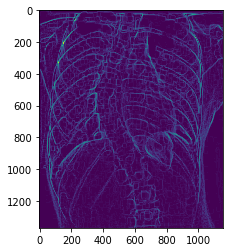

In [6]:
plt.imshow(transformacion)

# Canny Detector


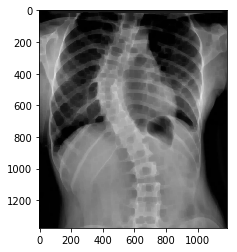

In [12]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import imutils


# Cargamos la imagen
original = cv2.imread("ex8_erosion.png")
plt.imshow(original)

In [13]:

# Convertimos a escala de grises
gris = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
 
# Aplicar suavizado Gaussiano
gauss = cv2.GaussianBlur(gris, (5,5), 0)
 
cv2.imshow("suavizado", gauss)

# Convertimos a escala de grises
gris = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
 
# Aplicar suavizado Gaussiano
gauss = cv2.GaussianBlur(gris, (5,5), 0)
 


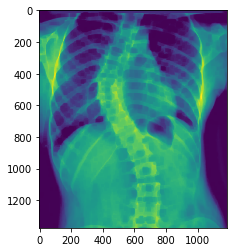

In [14]:
plt.imshow(gauss)

In [15]:


#FUNCIONA PERO LAS COORDENADAS SALEN DEL CORTE
img = gauss
dimensions = img.shape

# height, width, number of channels in image
altura = img.shape[0]
width = img.shape[1]
print("Altura: ",altura)
print("Ancho: ", width)
ancho=int(width)
alfa=int(altura/4)
print(alfa)
cons=0
for i in range(1,100):
    
    cons1=cons
    cons2=cons1+alfa
    print(cons1)
    print(cons2)
    print("____")
    image = img[cons1:cons2, 0:ancho]
    
    #convirtiendo a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #aplicando desenfoque gaussiano
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    #threshold?
    thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]


    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
                            cv2.CHAIN_APPROX_SIMPLE)

    cnts = cnts[0] if imutils.is_cv2() else cnts[1]
    count=1
    for c in cnts:
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        #print(cX)
        #print(cY)
        xx=str(cX)+","+str(cY)
        #CONTORNO ENCONTRADO
        cv2.drawContours(image, [c], -1, (0, 0, 255), 2)
        #CIRCULO DE CENTRO
        cv2.circle(image, (cX, cY), 7, (0,0, 255), -1)
        #COORDENADAS
        cv2.putText(image, xx, (cX - 50, cY - 50),
        #TIPO DE LETRA, COLOR?
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    
        #cv2.imshow("Image", image)
        #imagen=image
        #img[0:100,0:490]=imagen
        cv2.imshow("Image", img)
        count=count+1
        cv2.waitKey(0)
    cons = cons2
    i=i+1

Altura:  1374
Ancho:  1182
343
0
343
____


error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgproc/src/color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'CvtHelper'
